In [1]:
!pip install face_recognition
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
from google.colab.patches import cv2_imshow
from face_recognition.face_recognition_cli import image_files_in_folder
import cv2
import os
from datetime import datetime


face_1 = face_recognition.load_image_file("/content/drive/MyDrive/elonmusk.jfif")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("/content/drive/MyDrive/emmawatson.jfif")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("/content/drive/MyDrive/robertdowneyjr.jfif")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

face_4 = face_recognition.load_image_file("/content/drive/MyDrive/sundarpichai.jfif")
face_4_encoding = face_recognition.face_encodings(face_4)[0]

known_face_encodings = [
    face_1_encoding,
    face_2_encoding,
    face_3_encoding,
    face_4_encoding,
]
known_face_names = [
    "Elon Musk",
    "Emma Watson",
    "Robert Downy Jr.",
    "Sundar Pichai"
]

print("Done learning and creating profiles")

     |████████████████████████████████| 100.2MB 126kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=cbe9f4a705f9fcbd1a72b6bce34797b54b5eca802c6bbec5ed7e5b040eb677cb
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models
Done learning and creating profiles


In [2]:
def makeAttendanceEntry(name):
    with open('/content/drive/MyDrive/attendance_list.csv','r+') as FILE: #Opening file for reading and writing
        allLines = FILE.readlines()  # All rows will be saved in All lines
        attendanceList = []
        for line in allLines:
            entry = line.split(',')
            attendanceList.append(entry[0])
            
        #if name not in attendanceList:
        now = datetime.now()
        dtString = now.strftime('%d/%b/%Y, %H:%M:%S')
        FILE.writelines(f'\n{name},{dtString}')

Robert Downy Jr.


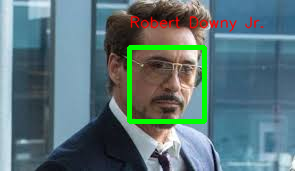

In [8]:
file_name = "/content/drive/MyDrive/unknown3.jfif"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0,0,255),1,cv2.LINE_AA)
    print(name)
    makeAttendanceEntry(name)

# display(pil_image)
cv2_imshow(unknown_image_to_draw)

In [9]:
import pandas as pd

sheet = pd.read_csv("/content/drive/MyDrive/attendance_list.csv", header=None)
sheet.columns = ["Names", "Date", "Time"]
sheet.head(20)

,Names,Date,Time
0,Elon Musk,19/Apr/2021,20:50:25
1,Unknown,19/Apr/2021,20:50:55
2,Robert Downy Jr.,19/Apr/2021,20:53:04
